In [20]:
import pandas as pd
import category_encoders as ce
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn import preprocessing


df = pd.read_csv('data/heart.csv')

In [21]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [22]:
df['old'] = df['age'].apply(lambda x: 1 if x > 60 else 0)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0


In [23]:
df[df['sex']==1]['age']

0      63
1      37
3      56
5      57
7      44
       ..
295    63
297    59
299    45
300    68
301    57
Name: age, Length: 207, dtype: int64

In [24]:
def search_man(age):
    trestbps_man = {20:123, 30:126, 40:129, 50:135, 60:142, 1000:142}
    for age_dict, trestbps in trestbps_man.items():
        if age <= age_dict:
            return trestbps
        
def search_woman(age):
    trestbps_woman = {20:116, 30:120, 40:127, 50:137, 60:144, 1000:159}
    for age_dict, trestbps in trestbps_woman.items():
        if age <= age_dict:
            return trestbps
        
df['trestbps_mean_man'] = df[df['sex'] == 1]['age'].apply(search_man)
df['trestbps_mean_man'] = df['trestbps_mean_man'].fillna(0)
df['trestbps_mean_woman'] = df[df['sex'] == 0]['age'].apply(search_woman)
df['trestbps_mean_woman'] = df['trestbps_mean_woman'].fillna(0)


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   sex                  303 non-null    int64  
 2   cp                   303 non-null    int64  
 3   trestbps             303 non-null    int64  
 4   chol                 303 non-null    int64  
 5   fbs                  303 non-null    int64  
 6   restecg              303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exang                303 non-null    int64  
 9   oldpeak              303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thal                 303 non-null    int64  
 13  target               303 non-null    int64  
 14  old                  303 non-null    int64  
 15  trestbps_mean_man    303 non-null    flo

In [26]:
df['trestbps_mean'] = df['trestbps_mean_man'] + df['trestbps_mean_woman']
df['trestbps_mean'] = df['trestbps_mean'].astype(int)
df = df.drop(['trestbps_mean_man', 'trestbps_mean_woman'], axis=1)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   cp             303 non-null    int64  
 3   trestbps       303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   thalach        303 non-null    int64  
 8   exang          303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  ca             303 non-null    int64  
 12  thal           303 non-null    int64  
 13  target         303 non-null    int64  
 14  old            303 non-null    int64  
 15  trestbps_mean  303 non-null    int32  
dtypes: float64(1), int32(1), int64(14)
memory usage: 36.8 KB


In [28]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,137
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0,144
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0,135
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1,142
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0,142


In [29]:
df.iloc[300]['trestbps_mean']

142.0

In [30]:
encoder = ce.OneHotEncoder(cols=['ca', 'cp', 'restecg', 'slope', 'thal'])
type_bin = encoder.fit_transform(df[['ca', 'cp', 'restecg', 'slope', 'thal']])
df = pd.concat([df, type_bin], axis=1)

c:\Users\cahek\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
c:\Users\cahek\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
c:\Users\cahek\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
c:\Users\cahek\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteri

In [31]:
df.shape[1]

35

In [32]:
#profile = ProfileReport(df)
#profile

In [33]:
mm_scaler = preprocessing.MinMaxScaler()
r_scaler = preprocessing.RobustScaler()
df['age'] = mm_scaler.fit_transform(df[['age']])
df['trestbps'] = mm_scaler.fit_transform(df[['trestbps']])

In [34]:
#heart_r = r_scaler.fit_transform(df)
df['chol'] = r_scaler.fit_transform(df[['chol']])

In [35]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,restecg_1,restecg_2,restecg_3,slope_1,slope_2,slope_3,thal_1,thal_2,thal_3,thal_4
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.528465,0.683168,0.966997,0.354941,0.098646,0.148515,0.528053,149.646865,0.326733,1.039604,...,0.485149,0.501650,0.013201,0.069307,0.468647,0.462046,0.059406,0.547855,0.386139,0.006601
std,0.189210,0.466011,1.032052,0.165454,0.816232,0.356198,0.525860,22.905161,0.469794,1.161075,...,0.500606,0.500824,0.114325,0.254395,0.499842,0.499382,0.236774,0.498528,0.487668,0.081110
min,0.000000,0.000000,0.000000,0.000000,-1.795276,0.000000,0.000000,71.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.385417,0.000000,0.000000,0.245283,-0.456693,0.000000,0.000000,133.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.541667,1.000000,1.000000,0.339623,0.000000,0.000000,1.000000,153.000000,0.000000,0.800000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.666667,1.000000,2.000000,0.433962,0.543307,0.000000,1.000000,166.000000,1.000000,1.600000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,3.000000,1.000000,5.102362,1.000000,2.000000,202.000000,1.000000,6.200000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

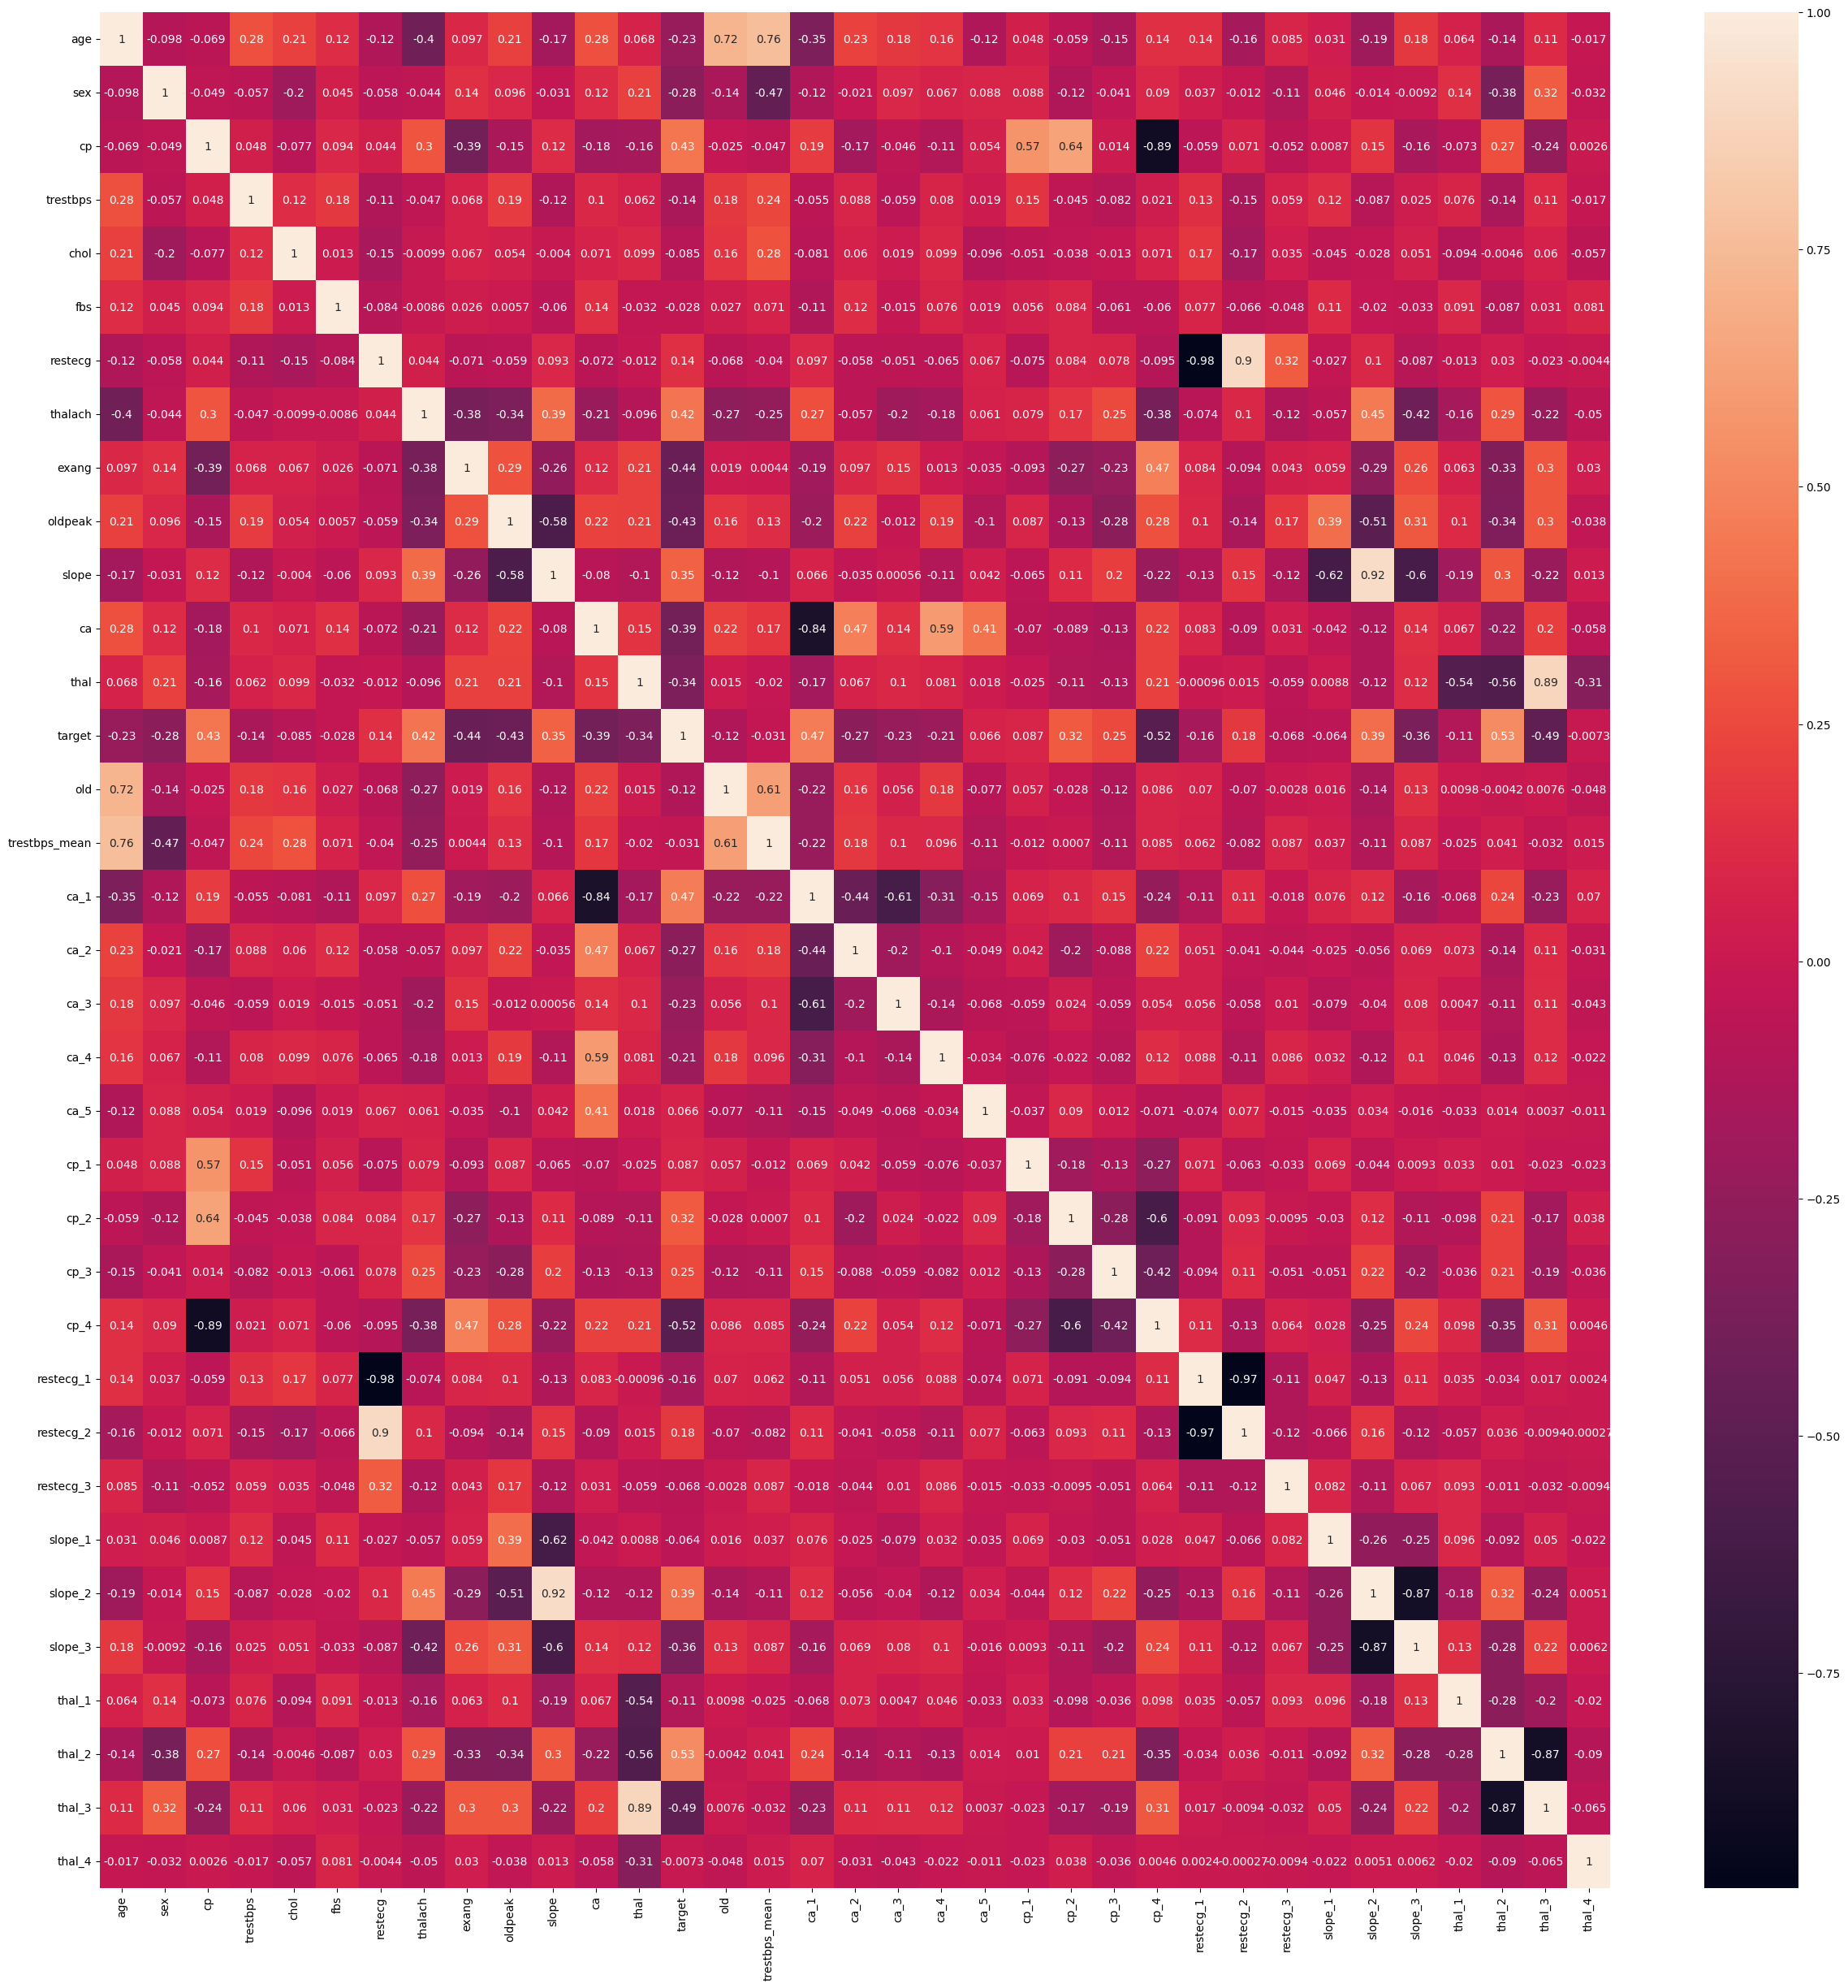

In [38]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True)